**Reminder**: if you are using Google Colab, you may be interested in getting the Pro plan of Google Gemini and Colab for free: https://colab.research.google.com/signup

# Hands-On Practice and Applications

In Week 1, we focused on two main concepts:
- Regression, specifically *linear regression*
- Perceptron, including Multi-Layer Perceptron (MLP)

Like all supervised machine learning algorithms, the key components are
- Dataset with inputs and labelled outputs
- Model with adjustable parameters to fit to training data
- Loss function (aka cost function or objective function)

# Linear Regression





The following dataset gives measurements of stellar masses and stellar radii for a certain class of stars.
The data are in the format $(\log_{10} M/M_\odot, \log_{10} R/R_\odot)$.

In [58]:
# columns are log10(stellar_mass/solar_mass), log10(stellar_radius/solar_radius)
stellar_data = [
    (-0.226564, -0.332539),
    (1.732429, 1.189290),
    (0.988779, 0.539741),
    (0.535439, 0.167849),
    (-0.969537, -0.611534),
    (-0.969619, -0.780734),
    (-1.302516, -0.987461),
    (1.444999, 0.811574),
    (0.543791, 0.260564),
    (0.907447, 0.583963),
    (-1.430013, -1.199721),
    (1.797693, 1.241714),
    (1.330305, 0.812655),
    (-0.778047, -0.651483),
    (-0.881795, -0.756052),
    (-0.876425, -0.506845),
    (-0.465576, -0.402090),
    (0.284172, 0.025135),
    (-0.031387, -0.010602),
    (-0.509821, -0.554198),
]

It's always a good idea to plot the data first, before you pursue any learning algorithms.
And it's always helpful to label the axes appropriately.
What do you notice about the data?

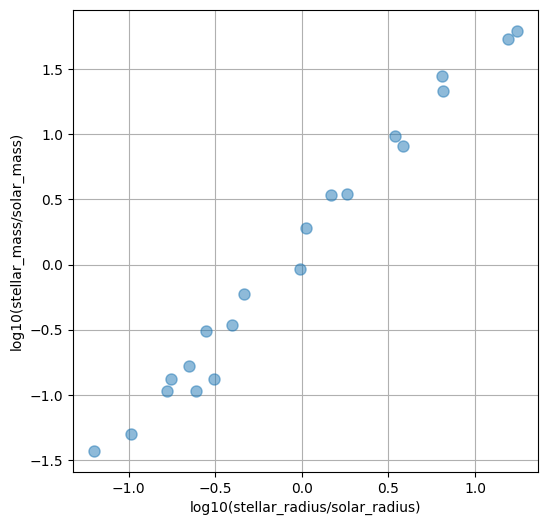

In [59]:
# Put your answer here
import matplotlib.pyplot as plt

stellar_mass_log10 = [row[0] for row in stellar_data]
stellar_radius_log10 = [row[1] for row in stellar_data]

fig = plt.figure(figsize=(6, 6))
plt.grid()
p1=plt.plot(stellar_radius_log10, stellar_mass_log10, "o", ms=8, alpha=0.5)
plt.xlabel("log10(stellar_radius/solar_radius)")
plt.ylabel("log10(stellar_mass/solar_mass)")
plt.show()

I'm considering the radius as the independent variable and the mass as the dependent variable, only because of the question below that asks us to predict the mass given the radius.
We can see that this is going to be well described by a linear regression.

Use a linear regression model to fit these data and extract the parameters.

The most annoying part is that we have to convert the Python list `stellar_radius_log10` from an N-dimensional list to a $N \times 1$-dimensional array, i.e. a vector.
We can do that with the NumPy `reshape` function.

In [60]:
print(stellar_radius_log10)
print(np.array(stellar_radius_log10).reshape(-1,1))

[-0.332539, 1.18929, 0.539741, 0.167849, -0.611534, -0.780734, -0.987461, 0.811574, 0.260564, 0.583963, -1.199721, 1.241714, 0.812655, -0.651483, -0.756052, -0.506845, -0.40209, 0.025135, -0.010602, -0.554198]
[[-0.332539]
 [ 1.18929 ]
 [ 0.539741]
 [ 0.167849]
 [-0.611534]
 [-0.780734]
 [-0.987461]
 [ 0.811574]
 [ 0.260564]
 [ 0.583963]
 [-1.199721]
 [ 1.241714]
 [ 0.812655]
 [-0.651483]
 [-0.756052]
 [-0.506845]
 [-0.40209 ]
 [ 0.025135]
 [-0.010602]
 [-0.554198]]


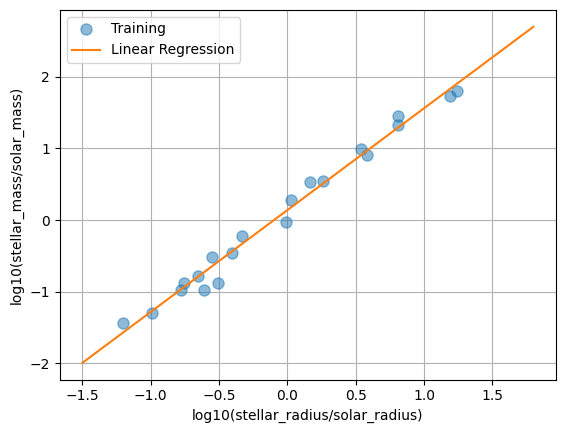

In [61]:
import numpy as np
from sklearn import datasets, linear_model
# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(np.array(stellar_radius_log10).reshape(-1,1), stellar_mass_log10)

# Use fitted linear model to predict the y value:
xvalues=np.linspace(-1.5,1.8,240) # grid of points
# Note: some are in the training set, some are not.
# The model has to learn to predict the y values for the out-of-set data
p1=plt.plot(stellar_radius_log10, stellar_mass_log10, "o", ms=8, alpha=0.5, label='Training')
linear_plot=plt.plot(xvalues, clf.predict(xvalues[:, np.newaxis]), label='Linear Regression')
plt.xlabel("log10(stellar_radius/solar_radius)")
plt.ylabel("log10(stellar_mass/solar_mass)")
plt.legend()
plt.grid()
plt.show()


Based on this learned regression, what is the stellar mass prediction for a star that has a radius 100 times the radius of the Sun?

We have to remember that the inputs are log10, so 100 times the solar radius corresponds to an input of $\log(100) = 2$.

In [62]:
clf.predict([[2]])

array([2.97681759])

We conclude that the mass will be $10^{2.97681759}=948$ times the solar mass.

This is actually far greater than the mass of any observed star.
It is a reminder that predictions outside of the training regime may be mathematically consistent but not physically possible.

# Single-Layer Perceptron

## Introduction to the problem

The NAND ("NOT AND") gate is the universal logic gate; any computational function can be implemented using NAND gates only.
If we hope to use machine learning to learn any arbitrary computational function, it would be nice to show that the ML can learn the logic of the NAND gate.

| Input A | Input B | Output |
|---------|---------|--------|
| 0       | 0       | 1      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

Try plotting this logic table in the same way we plotted the logic table for XOR.
Make inputs A and B on the axes, and make the output a color or a marker style to distinguish output 0 (FALSE) from output 1 (TRUE).

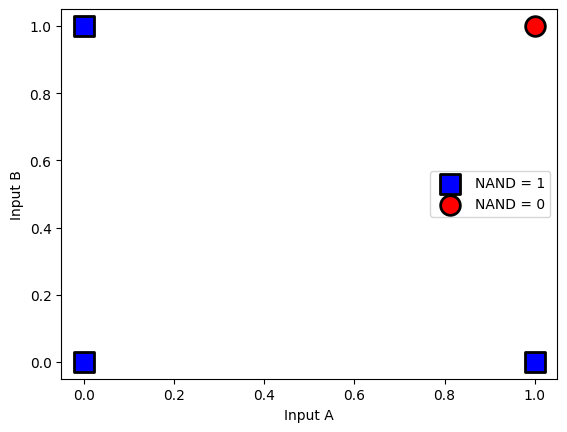

In [66]:
import torch
# NAND truth table as training data
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)

Y = torch.tensor([[1],
                  [1],
                  [1],
                  [0]], dtype=torch.float32)

# Plot the actual NAND points
for i in range(len(X)):
  color = 'red' if Y[i].item() == 0 else 'blue'
  marker = 'o' if Y[i].item() == 0 else 's'
  plt.scatter(X[i, 0].item(), X[i, 1].item(),
              c=color, marker=marker, s=200,
              edgecolors='black', linewidths=2,
              label=f'NAND = {int(Y[i].item())}' if i > 1 else '')
plt.xlabel('Input A')
plt.ylabel('Input B')
plt.legend()
plt.show()

Do you think you could train a linear algorithm, like the perceptron with a linear activation function, to learn this logic?
Why or why not?

Actually in this case we might expect the perceptron to work because it just has to define a line that separates the two logic regions.
Note that this is different from the XOR function, for which we had to define a band (two lines).

We'll use code that is very similar to the Lecture 2 notebook.

In [76]:
from torch import nn, optim

# Define single-layer perceptron
model = nn.Linear(2, 1)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [77]:
# Training loop
for epoch in range(1000):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0627
Epoch [200/1000], Loss: 0.0625
Epoch [300/1000], Loss: 0.0625
Epoch [400/1000], Loss: 0.0625
Epoch [500/1000], Loss: 0.0625
Epoch [600/1000], Loss: 0.0625
Epoch [700/1000], Loss: 0.0625
Epoch [800/1000], Loss: 0.0625
Epoch [900/1000], Loss: 0.0625
Epoch [1000/1000], Loss: 0.0625


In [80]:
# Test the model on the truth table
with torch.no_grad():
    predictions = model(X)
    # We'll make the cutoff 0.5 between classes. (If output>0.5 call it 1.)
    predicted_classes = (predictions > 0.5).float()
    print("\nPredictions:")
    print(predicted_classes)
    print("\nActual:")
    print(Y)


Predictions:
tensor([[1.],
        [1.],
        [1.],
        [0.]])

Actual:
tensor([[1.],
        [1.],
        [1.],
        [0.]])


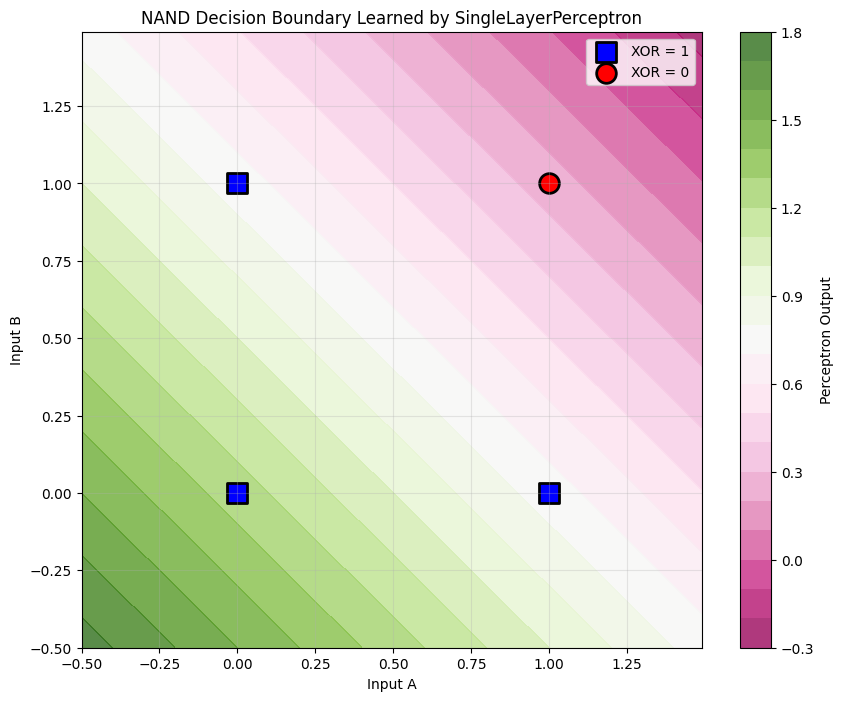

In [79]:
# Visualize decision boundary
def plot_decision_boundary(model):
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h),
                            torch.arange(y_min, y_max, h),
                            indexing='ij')

    # Predict for each point in the mesh
    test_grid_points = torch.stack([xx.flatten(), yy.flatten()], dim=1)
    with torch.no_grad():
        Z = model(test_grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx.numpy(), yy.numpy(), Z.numpy(), levels=20, cmap='PiYG', alpha=0.8)
    plt.colorbar(label='Perceptron Output')

    # Plot the actual XOR points
    for i in range(len(X)):
        color = 'red' if Y[i].item() == 0 else 'blue'
        marker = 'o' if Y[i].item() == 0 else 's'
        plt.scatter(X[i, 0].item(), X[i, 1].item(),
                   c=color, marker=marker, s=200,
                   edgecolors='black', linewidths=2,
                   label=f'XOR = {int(Y[i].item())}' if i > 1 else '')

    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.title('NAND Decision Boundary Learned by SingleLayerPerceptron')
    plt.legend()
    plt.grid(True, alpha=0.3)

plot_decision_boundary(model)

We can see that the dividing line between positive and negative outputs lies just below and to the left of the red box.

## Training the non-linear perceptron

A perceptron with a non-linear activation function can learn the NAND gate.
- Implement a simple perceptron $w_1 x_1 + w_2 x_2 + b$. (Why is this the right dimensionality?)
- Then pick a suitable activation function and try to train the perceptron on the NAND logic table.

What weights and biases accomplish the task? Can you check the results by multiplying the matrices by hand?

*Bonus challenge*: would you get the same results if you scaled up all of the weights by some arbitrary factor $a$?

I'll skip the non-linear function since we were able to learn it with the linear function.
Here are the weights for the linear function.

In [81]:
print(model)
print("Weights:", model.weight)
print("Bias:", model.bias)

Linear(in_features=2, out_features=1, bias=True)
Weights: Parameter containing:
tensor([[-0.5000, -0.5000]], requires_grad=True)
Bias: Parameter containing:
tensor([1.2500], requires_grad=True)


# Multi-Layer Perceptron

In some cases, the dataset may be so complicated that a multi-layer perceptron is needed.

The dataset below is a set of $(x,y)$ points that have been labeled with a classification: 0 or 1.


In [41]:
# elements are x, y, class
data_points = [
    (1.391964, 0.591951, 0),
    (0.606690, 1.248435, 0),
    (-1.174547, 0.148539, 0),
    (-0.408330, -1.252625, 0),
    (-1.247132, -0.801829, 0),
    (-0.263580, 1.711056, 0),
    (-1.801957, 0.085407, 0),
    (1.105398, -0.359085, 0),
    (-1.447320, 0.975134, 0),
    (-1.129734, 0.120408, 0),
    (0.280262, -1.890873, 0),
    (-0.667936, -1.371906, 0),
    (-1.314393, 0.256176, 0),
    (1.241144, 1.374043, 0),
    (-1.134106, -1.048900, 0),
    (1.377637, 0.825345, 0),
    (1.564710, 0.367663, 0),
    (1.625803, -0.037226, 0),
    (0.136397, -0.434754, 0),
    (-1.113864, 0.051424, 0),
    (-0.537702, 1.533307, 0),
    (-1.632389, -0.437353, 0),
    (-0.495534, -1.667353, 0),
    (0.112744, 1.218114, 0),
    (-0.016509, -1.194730, 0),
    (0.657386, 0.016074, 0),
    (1.032813, 1.569718, 0),
    (-0.793301, 0.793835, 0),
    (0.801178, 0.214648, 0),
    (0.072558, -1.641025, 0),
    (1.145626, -0.679588, 0),
    (-1.452350, 0.959904, 0),
    (1.903333, 0.331205, 0),
    (0.177903, -1.548886, 0),
    (-0.965821, -0.904743, 0),
    (0.292403, 1.151371, 0),
    (0.911768, -1.654384, 0),
    (-1.047602, 1.478948, 0),
    (0.945677, 0.409852, 0),
    (1.768868, 0.015823, 0),
    (0.461423, -0.044894, 0),
    (-1.233307, -0.689414, 0),
    (1.182094, 1.214905, 0),
    (-0.843053, -1.238449, 0),
    (0.068054, 0.009098, 0),
    (-0.206412, 0.255868, 0),
    (-1.280752, 0.545000, 0),
    (0.243811, 0.824579, 0),
    (0.097802, -1.062261, 0),
    (0.295360, 1.287576, 0),
    (2.729192, 1.427382, 1),
    (-2.913639, -2.303564, 1),
    (-2.723984, -2.755627, 1),
    (2.132764, 1.221947, 1),
    (-0.154957, -2.412995, 1),
    (-1.960789, -0.396890, 1),
    (0.810562, -2.728176, 1),
    (0.018818, 2.138939, 1),
    (0.952162, -2.022393, 1),
    (-2.576588, 0.854516, 1),
    (-2.840932, 0.514653, 1),
    (2.641381, 0.452845, 1),
    (2.648789, -0.683384, 1),
    (2.767143, 2.432104, 1),
    (-1.825253, -2.583832, 1),
    (-2.395332, -2.890669, 1),
    (-2.433342, 1.098041, 1),
    (-2.572868, -1.086146, 1),
    (2.069252, -2.860368, 1),
    (1.886811, -1.308871, 1),
    (-2.291011, 1.180423, 1),
    (0.773657, 2.264832, 1),
    (1.410426, 1.820886, 1),
    (-1.307793, -1.935363, 1),
    (1.503689, 1.841008, 1),
    (2.943031, -0.524294, 1),
    (-0.955179, 2.584544, 1),
    (2.150477, -0.426036, 1),
    (1.505226, 1.527257, 1),
    (-2.381257, 2.415317, 1),
    (-1.079702, 2.373139, 1),
    (-0.664790, -2.934974, 1),
    (2.432292, -2.452280, 1),
    (-1.084118, 2.700372, 1),
    (2.703643, 0.440627, 1),
    (1.749474, 1.737709, 1),
    (-2.452763, -0.033478, 1),
    (-2.654647, 0.297173, 1),
    (-0.350817, 2.326225, 1),
    (-0.894510, -2.297598, 1),
    (-2.142050, 1.569064, 1),
    (0.709308, -2.393264, 1),
    (-2.495359, 1.205815, 1),
    (-2.563422, 1.931160, 1),
    (1.237453, -2.511907, 1),
    (-2.490974, 2.919837, 1),
    (1.876797, 2.683491, 1),
    (2.916006, 1.520269, 1),
    (-0.742442, -2.498996, 1),
    (-0.454668, 2.438126, 1),
]

Plot the data set, using colors to represent the classes in the binary classification (0 or 1).

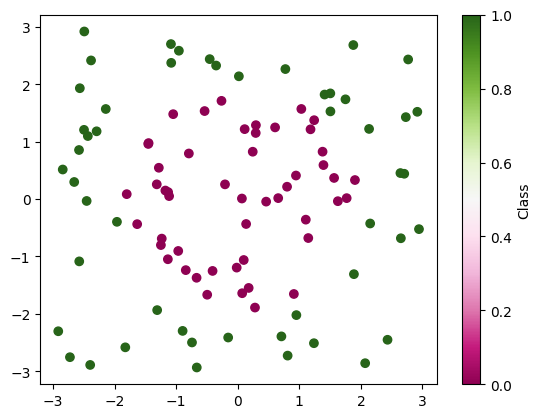

In [53]:
x = [row[0] for row in data_points]
y = [row[1] for row in data_points]
binary_class = [row[2] for row in data_points]


plt.scatter(x, y, c=binary_class, cmap='PiYG')
plt.colorbar(label='Class')
plt.show()

We can see that the points with value 0 all lie within a circular region with radius approximately 2.
Our ML algorithm will need to learn to create a non-linear boundary between the regions to separate them.

Implement an multi-layer perceptron with hidden layer(s) and non-linear activation function to learn this dataset classification.
You may need to experiment with the number of nodes in the hidden layer to get the best results.
Make sure to pay attention to the learning rate and increase it if the learning does not converge fast enough.

We need to put the training data into Torch tensors first. The idea is to put the `x,y` inputs together into a single data point. Then we should have an $N \times 2$ data tensor representing the input features.

In [89]:
input_features = torch.tensor([[xvalue,yvalue] for xvalue,yvalue in zip(x,y)], dtype=torch.float32)
classification = torch.tensor([[c] for c in binary_class], dtype=torch.float32)
print(input_features)
print(classification)

tensor([[ 1.3920,  0.5920],
        [ 0.6067,  1.2484],
        [-1.1745,  0.1485],
        [-0.4083, -1.2526],
        [-1.2471, -0.8018],
        [-0.2636,  1.7111],
        [-1.8020,  0.0854],
        [ 1.1054, -0.3591],
        [-1.4473,  0.9751],
        [-1.1297,  0.1204],
        [ 0.2803, -1.8909],
        [-0.6679, -1.3719],
        [-1.3144,  0.2562],
        [ 1.2411,  1.3740],
        [-1.1341, -1.0489],
        [ 1.3776,  0.8253],
        [ 1.5647,  0.3677],
        [ 1.6258, -0.0372],
        [ 0.1364, -0.4348],
        [-1.1139,  0.0514],
        [-0.5377,  1.5333],
        [-1.6324, -0.4374],
        [-0.4955, -1.6674],
        [ 0.1127,  1.2181],
        [-0.0165, -1.1947],
        [ 0.6574,  0.0161],
        [ 1.0328,  1.5697],
        [-0.7933,  0.7938],
        [ 0.8012,  0.2146],
        [ 0.0726, -1.6410],
        [ 1.1456, -0.6796],
        [-1.4524,  0.9599],
        [ 1.9033,  0.3312],
        [ 0.1779, -1.5489],
        [-0.9658, -0.9047],
        [ 0.2924,  1

In [138]:
from torch import nn, optim
model = nn.Sequential(
    nn.Linear(2, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=2.0)

In [139]:
# Define the training loop
for epoch in range(50000):

  # Forward pass: Calculate the predicted output class using the model
  output = model(input_features)

  # Calculate the loss between the predicted output class and the actual target class
  loss = criterion(output, classification)

  # Backpropagation: Compute gradients of the model parameters with respect to the loss
  loss.backward()
  # Update the model parameters using the computed gradients
  optimizer.step()
  # Zero out the gradients for the next iteration to avoid accumulation
  optimizer.zero_grad()

  if epoch % 100 == 0:
      print(f"Epoch {epoch} done! Loss = {loss}")

Epoch 0 done! Loss = 0.25687161087989807
Epoch 100 done! Loss = 0.23912926018238068
Epoch 200 done! Loss = 0.18420115113258362
Epoch 300 done! Loss = 0.10757196694612503
Epoch 400 done! Loss = 0.06657549738883972
Epoch 500 done! Loss = 0.05079047381877899
Epoch 600 done! Loss = 0.04313865303993225
Epoch 700 done! Loss = 0.0386861115694046
Epoch 800 done! Loss = 0.03571362420916557
Epoch 900 done! Loss = 0.03351173177361488
Epoch 1000 done! Loss = 0.03174908086657524
Epoch 1100 done! Loss = 0.030256805941462517
Epoch 1200 done! Loss = 0.02894374541938305
Epoch 1300 done! Loss = 0.02775871567428112
Epoch 1400 done! Loss = 0.026671888306736946
Epoch 1500 done! Loss = 0.02566518262028694
Epoch 1600 done! Loss = 0.02472742088139057
Epoch 1700 done! Loss = 0.023851780220866203
Epoch 1800 done! Loss = 0.023033935576677322
Epoch 1900 done! Loss = 0.02227066457271576
Epoch 2000 done! Loss = 0.021558744832873344
Epoch 2100 done! Loss = 0.020894668996334076
Epoch 2200 done! Loss = 0.0202747490257

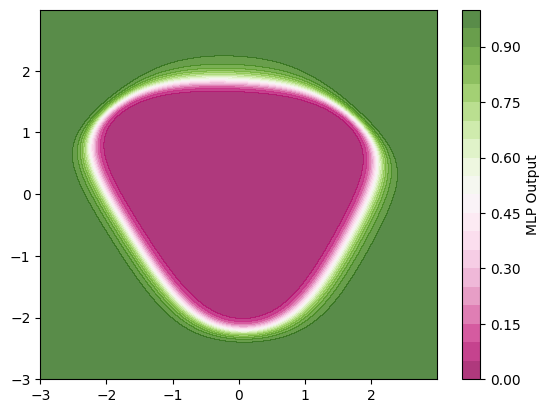

In [140]:
# Check the classification across the plane
def plot_decision(model):
    # Create a mesh grid
    x_min, x_max = -3., 3.
    y_min, y_max = -3., 3.
    h = 0.01
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h),
                            torch.arange(y_min, y_max, h),
                            indexing='ij')

    # Predict for each point in the mesh
    test_grid_points = torch.stack([xx.flatten(), yy.flatten()], dim=1)
    with torch.no_grad():
        Z = model(test_grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx.numpy(), yy.numpy(), Z.numpy(), levels=20, cmap='PiYG', alpha=0.8)
    plt.colorbar(label='MLP Output')

plot_decision(model)

I found that it helped to do many training epochs. You can get a decent result with just one hidden layer, but you need at least 3 nodes in the layer. Perhaps this is what the NN needs to learn to calculate the radius from $x^2$ and $y^2$.

Based on this learned classification, how would you classify the following points?
- (1.0, -1.0)
- (2.5, -2.5)
- (0.0, 0.0)

In [142]:
print(model(torch.tensor([[1.0, -1.0]], dtype=torch.float32)))
print(model(torch.tensor([[2.5, -2.5]], dtype=torch.float32)))
print(model(torch.tensor([[0.0, 0.0]], dtype=torch.float32)))


tensor([[0.0022]], grad_fn=<SigmoidBackward0>)
tensor([[0.9977]], grad_fn=<SigmoidBackward0>)
tensor([[2.5201e-09]], grad_fn=<SigmoidBackward0>)


As expected, the first and third points are inside the circle, and the second point is outside.